In [1]:
%matplotlib inline
import nltk
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import random
import string
import seaborn as sns

In [31]:
#In case you don't have nltk working, here are the english stopwords
eng_stops = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', \
             "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',\
             'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', \
             'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',\
             'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
             'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', \
             'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', \
             'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',\
             'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', \
             'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', \
             'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', \
             'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', \
             'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",\
             'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", \
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", \
             'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',\
             "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',\
             "wouldn't"]

### Word count with dictionaries

In [5]:
with open('test_3.txt', 'r', encoding = 'UTF-8') as clinton: #open the file
    result = {}
    text = clinton.read() #reads in whole file as a string, text is a string
    text = text.lower().translate(text.maketrans('','','?!,.:;"')).split()
    for word in text:
        if word not in result:
            result[word] = 1
        else:
            old = result[word] #look up old value
            new_v = old + 1 #add 1
            result[word] = new_v #assign new value to word
            result[word] += 1 #result[word] = result[word] + 1
        
    return result

{'how': 1, 'are': 1, 'you': 3, 'donald': 1, 'well': 1, 'thank': 1, 'lester': 1, 'and': 1, 'thanks': 1, 'to': 1, 'hofstra': 1, 'for': 1, 'hosting': 1, 'us': 1}


In [ ]:
write_test('debate-clinton.txt', 'test_3.txt', 3)

In [10]:
def word_count(filename):
    with open(filename, 'r', encoding = 'UTF-8') as clinton: #open the file
        result = {}
        text = clinton.read() #reads in whole file as a string, text is a string
        text = text.lower().translate(text.maketrans('','','?!,.:;"')).split()
        for word in text:
            if word not in result:
                result[word] = 1
            else:
                old = result[word] #look up old value
                new_v = old + 1 #add 1
                result[word] = new_v #assign new value to word
                result[word] += 1 #result[word] = result[word] + 1
    return result

In [11]:
words = word_count('test_3.txt')
print(words)

{'how': 1, 'are': 1, 'you': 3, 'donald': 1, 'well': 1, 'thank': 1, 'lester': 1, 'and': 1, 'thanks': 1, 'to': 1, 'hofstra': 1, 'for': 1, 'hosting': 1, 'us': 1}


In [12]:
words = word_count('debate-clinton.txt')
print(words)

{'how': 25, 'are': 75, 'you': 141, 'donald': 41, 'well': 69, 'thank': 1, 'lester': 11, 'and': 375, 'thanks': 1, 'to': 445, 'hofstra': 1, 'for': 83, 'hosting': 1, 'us': 41, 'the': 467, 'central': 1, 'question': 7, 'in': 191, 'this': 63, 'election': 3, 'is': 111, 'really': 37, 'what': 77, 'kind': 19, 'of': 247, 'country': 31, 'we': 255, 'want': 39, 'be': 113, 'future': 9, "we'll": 11, 'build': 5, 'together': 11, 'today': 3, 'my': 19, "granddaughter's": 1, 'second': 7, 'birthday': 1, 'so': 79, 'i': 267, 'think': 77, 'about': 67, 'a': 211, 'lot': 35, 'first': 11, 'have': 167, 'an': 21, 'economy': 25, 'that': 267, 'works': 3, 'everyone': 11, 'not': 77, 'just': 27, 'those': 15, 'at': 65, 'top': 9, 'means': 7, 'need': 45, 'new': 25, 'jobs': 33, 'good': 31, 'with': 69, 'rising': 5, 'incomes': 9, 'invest': 7, 'your': 45, 'infrastructure': 1, 'advanced': 1, 'manufacturing': 3, 'innovation': 1, 'technology': 1, 'clean': 5, 'renewable': 1, 'energy': 7, 'small': 5, 'business': 29, 'because': 43, 'm

### Iterating over a dictionary

In [13]:
r = {'good': 16, 'with': 35, 'rising': 3, 'incomes': 5, 'invest': 4} 

In [14]:
for item in r:
    print(item)

good
with
rising
incomes
invest


In [15]:
for item in r.keys():
    print(item)

good
with
rising
incomes
invest


In [16]:
for item in r.values():
    print(item)

16
35
3
5
4


In [17]:
for item in r.items():
    print(item)

('good', 16)
('with', 35)
('rising', 3)
('incomes', 5)
('invest', 4)


In [18]:
for key, value in r.items():
    print('Key is', key,'\nValue is',value)

Key is good 
Value is 16
Key is with 
Value is 35
Key is rising 
Value is 3
Key is incomes 
Value is 5
Key is invest 
Value is 4


### Most common words (without NLTK)

In [21]:
#How does it work?
#What's wrong with it?
def top_words(tally, num = 10):
    inv = {} #empty dictionary
    for w,n in tally.items():
        inv[n] = w
    print(inv)
    tg = sorted(inv, reverse = True)[0:num]
    result = {}
    for val in tg:
        result[inv[val]] = val
    return result


In [22]:
result = top_words(words, 20)
print(result) 

{25: 'some', 75: 'are', 141: 'you', 41: 'who', 69: 'with', 1: 'depended', 11: 'weapons', 375: 'and', 445: 'to', 83: 'he', 467: 'the', 7: 'after', 191: 'in', 63: 'this', 3: 'name', 111: 'is', 37: 'one', 77: 'would', 19: 'communities', 247: 'of', 31: 'get', 255: 'we', 39: "it's", 113: 'be', 9: 'iraq', 5: 'she', 79: 'so', 267: 'that', 67: 'about', 211: 'a', 35: 'when', 167: 'have', 21: 'police', 27: 'got', 15: 'nuclear', 65: 'at', 45: 'as', 33: "we've", 29: 'said', 43: 'because', 13: 'working', 93: 'do', 61: 'people', 49: 'going', 117: 'it', 23: 'very', 51: 'was', 17: 'information', 57: '--', 71: 'but', 47: 'they'}
{'the': 467, 'to': 445, 'and': 375, 'that': 267, 'we': 255, 'of': 247, 'a': 211, 'in': 191, 'have': 167, 'you': 141, 'it': 117, 'be': 113, 'is': 111, 'do': 93, 'he': 83, 'so': 79, 'would': 77, 'are': 75, 'but': 71, 'with': 69}


In [23]:
#same as above in case you are curious, but still has same problems
def top_words(tally, num = 10):
    inv = {n:w for w,n in tally.items()}
    tg = sorted(inv, reverse = True)[0:num]
    return {inv[val]:val for val in tg}


In [24]:
result = top_words(words, 20)
print(result)

{'the': 467, 'to': 445, 'and': 375, 'that': 267, 'we': 255, 'of': 247, 'a': 211, 'in': 191, 'have': 167, 'you': 141, 'it': 117, 'be': 113, 'is': 111, 'do': 93, 'he': 83, 'so': 79, 'would': 77, 'are': 75, 'but': 71, 'with': 69}


### Word count and other things with NLTK

In [36]:
with open('debate-trump.txt','r',encoding='UTF-8') as clinton:
    tokens = clinton.read().translate(str.maketrans('','','?!,.:;-')).lower().split()

In [37]:
word_c = nltk.FreqDist(tokens)

In [27]:
print(word_c.most_common(20))

[('the', 234), ('to', 223), ('and', 188), ('i', 134), ('that', 134), ('we', 128), ('of', 124), ('a', 106), ('in', 96), ('have', 84), ('you', 71), ('it', 59), ('be', 57), ('is', 56), ('do', 47), ('for', 42), ('he', 42), ('so', 40), ('what', 39), ('think', 39)]


In [38]:
tokens = [token for token in tokens if token not in eng_stops]

In [ ]:
result = []
for token in tokens:
    if token not in eng_stops:
        result.append(token)

In [39]:
word_c = nltk.FreqDist(tokens)

In [40]:
print(word_c.most_common(20))

[('country', 49), ('going', 46), ('look', 44), ("they're", 40), ('said', 37), ('think', 37), ('people', 33), ('say', 31), ("i'm", 30), ("that's", 29), ('many', 28), ('know', 27), ('secretary', 27), ('get', 26), ("we're", 25), ('one', 25), ('want', 23), ('like', 22), ('well', 22), ('years', 22)]


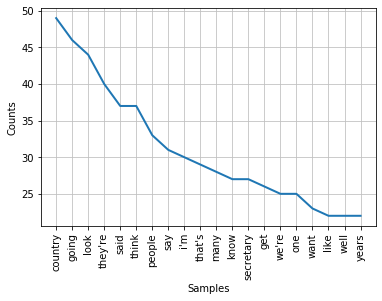

In [41]:
word_c.plot(20)

In [42]:
debate_text = nltk.Text(tokens)

In [47]:
debate_text.concordance('jobs')

Displaying 18 of 18 matches:
thank lester jobs fleeing country they're going mexico
ny countries thing we're losing good jobs many look what's happening mexico fr
small car division leaving thousands jobs leaving michigan leaving ohio they'r
ing perhaps we'll talking later stop jobs stolen us stop companies leaving uni
ls stop countries stealing companies jobs well one thing start father gave sma
te trade deals lester they're taking jobs they're giving incentives they're th
eated movement years what's happened jobs country economy generally look owe $
t longer lester well first thing let jobs leave companies leaving could name m
i exact tell much better job keeping jobs much better job giving companies inc
 michigan look ohio look places many jobs companies leaving they're gone hilla
nk solutions bring excuse bring back jobs can't bring back jobs yeah 30 years 
use bring back jobs can't bring back jobs yeah 30 years well approved nafta ap
 proud create tremendous numbers new jobs regul

In [44]:
print(debate_text.common_contexts(['jobs']))

lester_fleeing good_many thousands_leaving stop_stolen companies_well
taking_they're happened_country let_leave keeping_much many_companies
back_can't back_yeah new_regulations major_wealthy tremendous_they're
terms_terms creating_want
None


In [45]:
print(debate_text.collocation_list())

['secretary clinton', 'sean hannity', 'law order', 'inner cities', 'middle east', '$20 trillion', 'north korea', 'trade deals', 'long time', 'birth certificate', 'united states', 'new york', 'wait minute', 'barack obama', 'ahead schedule', "obama's fault", 'real estate', 'saudi arabia', "they're going", 'taken care']


### Wordcloud (ask me how!)

Try this from a terminal:

conda install -c conda-forge wordcloud

Don't be surprised if it doesn't work!

In [ ]:
text = open('debate-trump.txt','r',encoding = 'UTF-8')
up_text = text.read().upper()
text.close()
stopwords = set(STOPWORDS)
stopwords.add('UPON')
wc = WordCloud(margin=10,random_state=1, stopwords=stopwords, colormap='jet').generate(up_text)
wc.to_file('test.png')
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()